# AMP-SOA portfolio optimization using adaptive meta-policy based on second-order agents with deep reinforcment learning
---

## 8 Backtesting and Evaluation of the Portfolios

### 6.1 Import Relevant Packages

In [151]:
import numpy as np 
import pandas as pd 
import pyfolio as pf
from pyfolio import timeseries
import matplotlib.pylab as plt
#from backtest import BackTestStats, BaselineStats, BackTestPlot, backtest_strat, baseline_strat
from backtest import backtest_strat, baseline_strat
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 6.2 Load the Train and Test Data for Portfolios

In [152]:
import pandas as pd

def load_csv_files(filenames):
    dataframes = {}
    for name, filename in filenames.items():
        df = pd.read_csv(filename)
        if 'Unnamed: 0' in df.columns:
            df = df.drop(columns=['Unnamed: 0'])
        dataframes[name] = df
    return dataframes

# Dictionary of filenames
filenames = {
    'a2c_train_daily_return': 'a2c_train_daily_return.csv',
    'ppo_train_daily_return': 'ppo_train_daily_return.csv',
    'ddpg_train_daily_return': 'ddpg_train_daily_return.csv',
    'td3_train_daily_return': 'td3_train_daily_return.csv',
    'sac_train_daily_return': 'sac_train_daily_return.csv',
    'a2c_test_returns': 'a2c_test_daily_return.csv',
    'ppo_test_returns': 'ppo_test_daily_return.csv',
    'ddpg_test_returns': 'ddpg_test_daily_return.csv',
    'td3_test_returns': 'td3_test_daily_return.csv',
    'sac_test_returns': 'sac_test_daily_return.csv',
    'proposed_method1_test_daily_return': 'proposed_method1_test_daily_return.csv',
}

# Load the data
dataframes = load_csv_files(filenames)

# Access individual DataFrames
a2c_train_daily_return = dataframes['a2c_train_daily_return']
ppo_train_daily_return = dataframes['ppo_train_daily_return']
ddpg_train_daily_return = dataframes['ddpg_train_daily_return']
td3_train_daily_return = dataframes['td3_train_daily_return']
sac_train_daily_return = dataframes['sac_train_daily_return']
a2c_test_returns = dataframes['a2c_test_returns']
ppo_test_returns = dataframes['ppo_test_returns']
ddpg_test_returns = dataframes['ddpg_test_returns']
td3_test_returns = dataframes['td3_test_returns']
sac_test_returns = dataframes['sac_test_returns']
proposed_method1_test_daily_return = dataframes['proposed_method1_test_daily_return']



In [ ]:
%store a2c_train_daily_return
%store ppo_train_daily_return
%store ddpg_train_daily_return
%store td3_train_daily_return
%store sac_train_daily_return
%store a2c_test_returns
%store ppo_test_returns
%store ddpg_test_returns
%store td3_test_returns
%store sac_test_returns
%store proposed_method1_test_daily_return
#%store prices_train_df
#%store prices_test_df

In [ ]:
%store -r prices_train_df
%store -r prices_test_df

In [ ]:

a2c_train_cum_returns = (
    1 + a2c_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
a2c_train_cum_returns = a2c_train_cum_returns['daily_return']
a2c_train_cum_returns.name = 'Portfolio 1: A2C Model'

ppo_train_cum_returns = (
    1 + ppo_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
ppo_train_cum_returns = ppo_train_cum_returns['daily_return']
ppo_train_cum_returns.name = 'Portfolio 2: PPO Model'

ddpg_train_cum_returns = (
    1 + ddpg_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
ddpg_train_cum_returns = ddpg_train_cum_returns['daily_return']
ddpg_train_cum_returns.name = 'Portfolio 3: DDPG Model'

td3_train_cum_returns = (
    1 + td3_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
td3_train_cum_returns = td3_train_cum_returns['daily_return']
td3_train_cum_returns.name = 'Portfolio 4: TD3 Model'

sac_train_cum_returns = (
    1 + sac_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
sac_train_cum_returns = sac_train_cum_returns['daily_return']
sac_train_cum_returns.name = 'Portfolio 5: SAC Model'


date_list = list(ddpg_train_cum_returns.index)


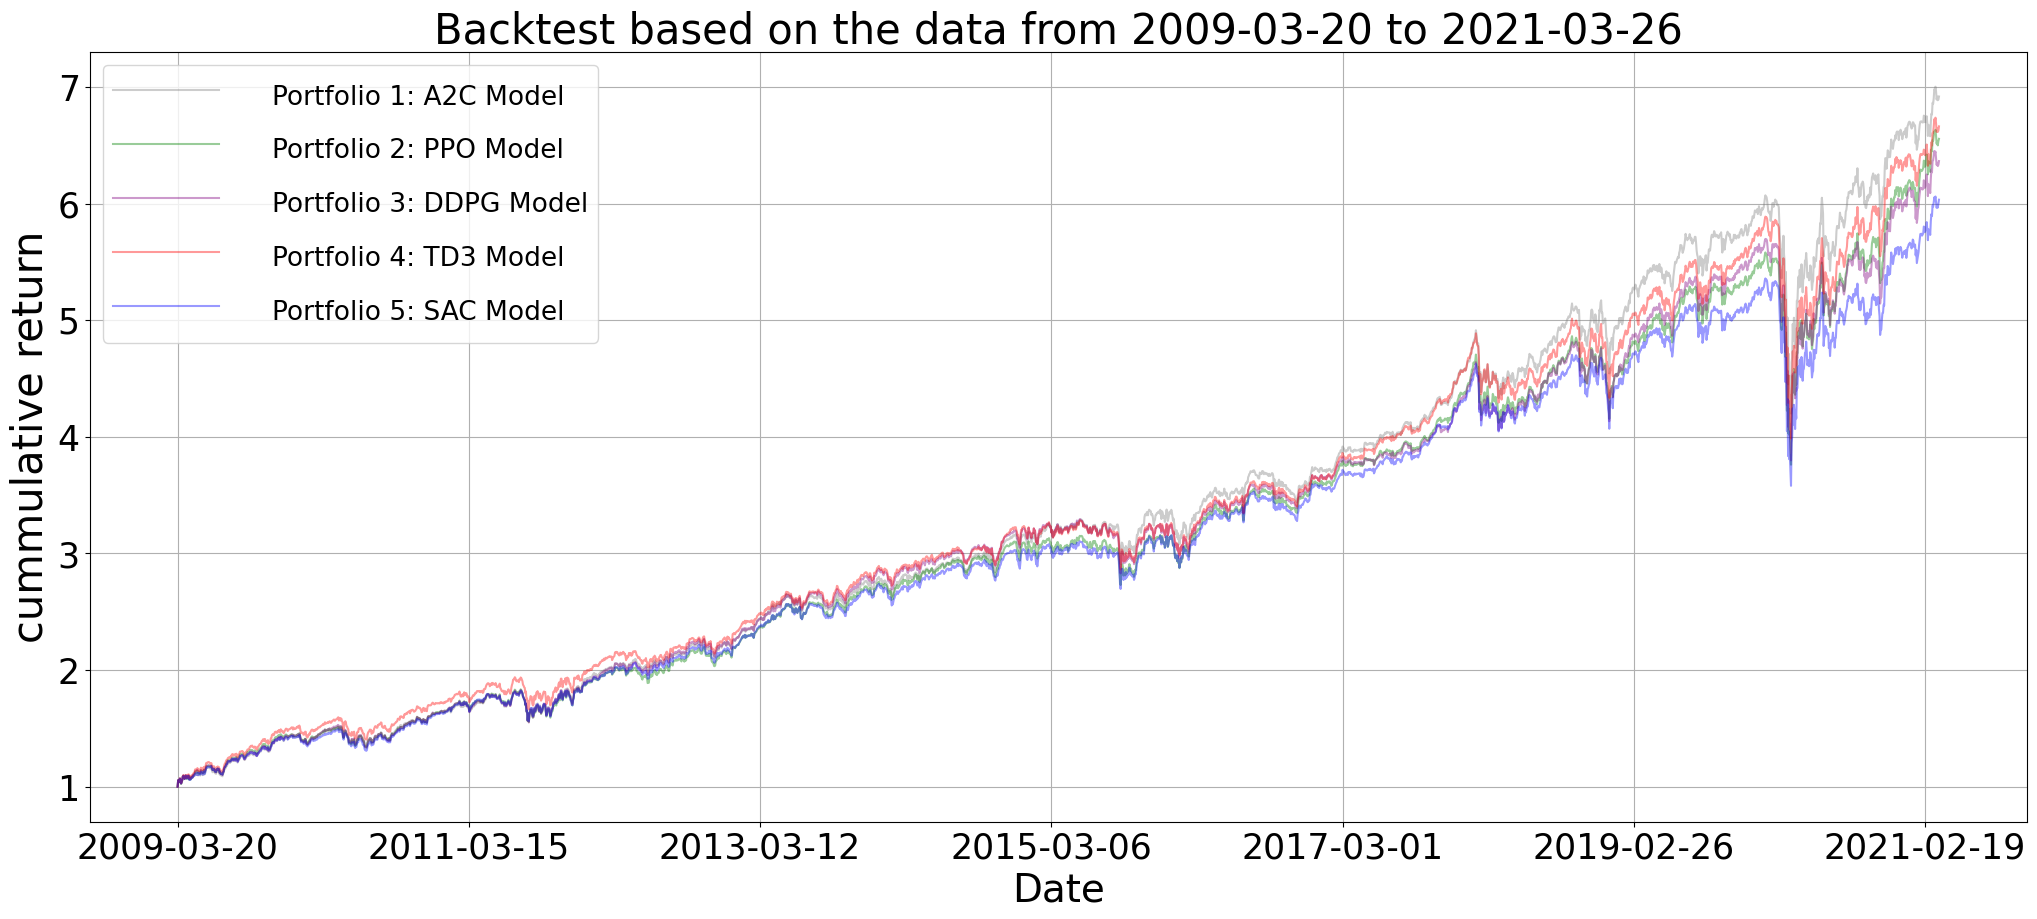

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
a2c_train_cum_returns.plot(ax=ax, color='gray', alpha=0.4)
ppo_train_cum_returns.plot(ax=ax, color='green', alpha=0.4)
ddpg_train_cum_returns.plot(ax=ax, color='purple', alpha=0.4)
td3_train_cum_returns.plot(ax=ax, color='red', alpha=0.4)
sac_train_cum_returns.plot(ax=ax, color='blue', alpha=0.4)
plt.legend(loc="best", fontsize=19, handlelength=4,
           handleheight=2, handletextpad=2)
plt.grid(True)
ax.set_ylabel("cummulative return", fontsize=30)
ax.set_xlabel("Date", fontsize=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title(
    "Backtest based on the data from 2009-03-20 to 2021-03-26", fontsize=30)
fig.savefig('results/result_train/back_test_on_train_data.pdf')
a2c_train_cum_returns.to_csv('results/result_train/a2c_train_cum_return.csv')
ppo_train_cum_returns.to_csv('results/result_train/ppo_train_cum_return.csv')
ddpg_train_cum_returns.to_csv('results/result_train/ddpg_train_cum_return.csv')
td3_train_cum_returns.to_csv('results/result_train/td3_train_cum_return.csv')
sac_train_cum_returns.to_csv('results/result_train/sac_train_cum_return.csv')


### 6.4 Evaluating the Portfolios on Test Data

In [159]:
import pandas as pd

main_proposed_method_eachstock_return = pd.read_csv(
    'hosini_daily_return.csv')
main_proposed_method_eachstock_return['daily_return'] = main_proposed_method_eachstock_return.sum(axis=1)

In [ ]:
a2c_test_cum_returns = (1 + a2c_test_returns['daily_return']).cumprod()
a2c_test_cum_returns.name = 'Portfolio 1: A2C Model'
ppo_test_cum_returns = (1 + ppo_test_returns['daily_return']).cumprod()
ppo_test_cum_returns.name = 'Portfolio 2: PPO Model'
ddpg_test_cum_returns = (1 + ddpg_test_returns['daily_return']).cumprod()
ddpg_test_cum_returns.name = 'Portfolio 3: DDPG Model'
td3_test_cum_returns = (1 + td3_test_returns['daily_return']).cumprod()
td3_test_cum_returns.name = 'Portfolio 4: TD3 Model'
sac_test_cum_returns = (1 + sac_test_returns['daily_return']).cumprod()
sac_test_cum_returns.name = 'Portfolio 5: SAC Model'
proposed_method1_test_cum_return = (
    1 + proposed_method1_test_daily_return['daily_return']).cumprod()
proposed_method1_test_cum_return.name = 'Portfolio 6: Proposed method 1'

main_proposed_method_cum_return = (
    1 + main_proposed_method_eachstock_return['daily_return']).cumprod()
main_proposed_method_cum_return.name = 'Portfolio 7: Main proposed method'


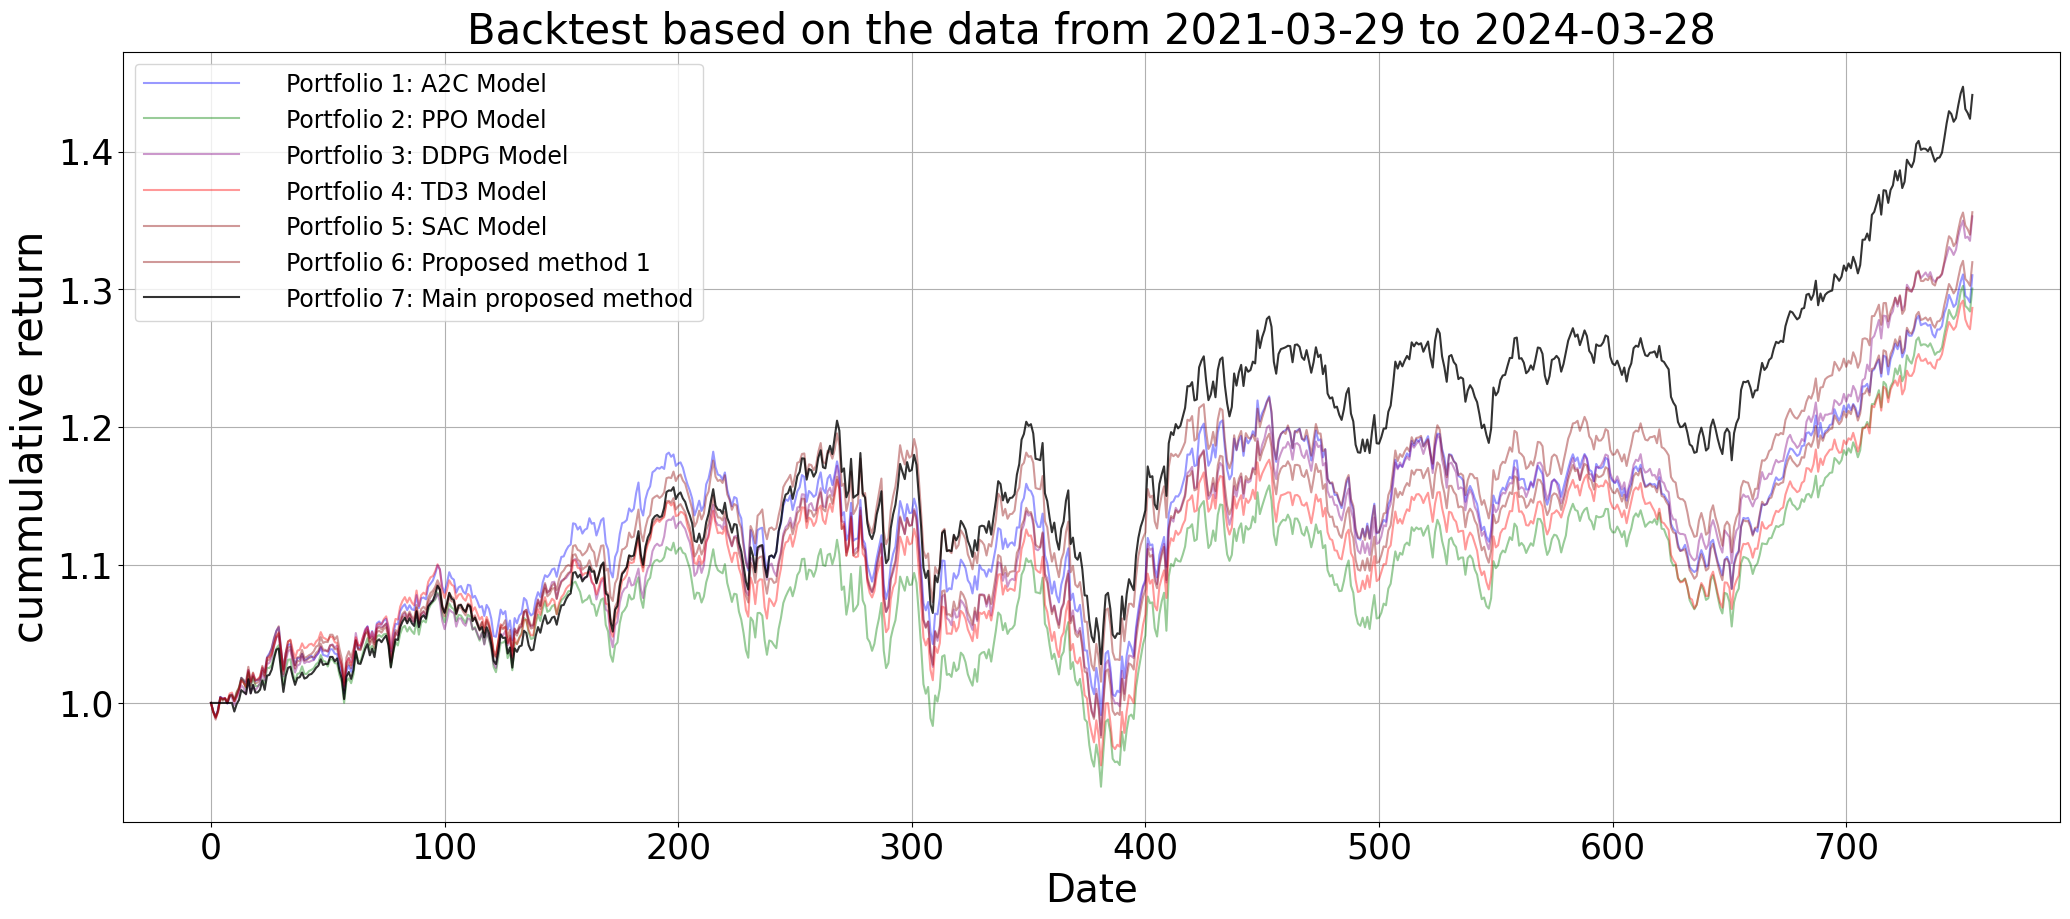

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
a2c_test_cum_returns.plot(ax=ax, color='blue', alpha=.4);
ppo_test_cum_returns.plot(ax=ax, color='green', alpha=.4);
ddpg_test_cum_returns.plot(ax=ax, color='purple', alpha=.4);
td3_test_cum_returns.plot(ax=ax, color='red', alpha=0.4);
sac_test_cum_returns.plot(ax=ax, color='darkred', alpha=0.4);
proposed_method1_test_cum_return.plot(ax=ax, color='darkred', alpha=0.4)
main_proposed_method_cum_return.plot(ax=ax, color='black', alpha=0.8)
plt.legend(loc="best", fontsize=17, handlelength=4, handleheight=1,handletextpad=2);
plt.grid(True);
ax.set_ylabel("cummulative return", fontsize = 30);
ax.set_xlabel("Date", fontsize=28);
ax.set_title("Backtest based on the data from 2021-03-29 to 2024-03-28", fontsize=30);
ax.tick_params(axis='x', labelsize=25);
ax.tick_params(axis='y', labelsize=25);

fig.savefig('./results/result_test/back_test_on_test_data.pdf');
a2c_test_cum_returns.to_csv('./results/result_test/a2c_test_cum_returns.csv')
ppo_test_cum_returns.to_csv('./results/result_test/ppo_test_cum_returns.csv')
ddpg_test_cum_returns.to_csv('./results/result_test/ddpg_test_cum_returns.csv')
td3_test_cum_returns.to_csv('./results/result_test/td3_test_cum_returns.csv')
sac_test_cum_returns.to_csv('./results/result_test/sac_test_cum_returns.csv')
proposed_method1_test_cum_return.to_csv(
    './results/result_test/proposed_method1_test_cum_return.csv')
main_proposed_method_eachstock_return.to_csv(
    './results/result_test/main_proposed_method_eachstock_return.csv')

### 6.5 Get the Portfolio Statistics

In [162]:
# Define a Function for Getting the Portfolio Statistics

def portfolio_stats(portfolio_returns):
    # Pass the returns into a dataframe
    port_rets_df = pd.DataFrame(portfolio_returns)
    port_rets_df = port_rets_df.reset_index()
    port_rets_df.columns = ['date', 'daily_return']

    # Use the FinRL Library to get the Portfolio Returns
    # This makes use of the Pyfolio Library

    DRL_strat = backtest_strat(port_rets_df)
    perf_func = timeseries.perf_stats
    perf_stats_all = perf_func(returns=DRL_strat,
                               factor_returns=DRL_strat,
                               positions=None, transactions=None, turnover_denom="AGB")
    perf_stats_all = pd.DataFrame(perf_stats_all)
    perf_stats_all.columns = ['Statistic']
    return perf_stats_all

In [163]:
# Get the Portfolio Statistics for all the portfolios
portfolios_returns_dict = {'A2C Model': a2c_test_returns['daily_return'],
                           'PPO Model': ppo_test_returns['daily_return'],
                           'DDPG Model': ddpg_test_returns['daily_return'],
                           'TD3 Model': td3_test_returns['daily_return'],
                           'SAC Model': sac_test_returns['daily_return'],
                           'Proposed method1': proposed_method1_test_daily_return['daily_return'],
                           'Main proposed method': main_proposed_method_eachstock_return['daily_return']
                           }

portfolios_stats = pd.DataFrame()
for i, j in portfolios_returns_dict.items():
    port_stats = portfolio_stats(j)
    portfolios_stats[i] = port_stats['Statistic']

In [164]:
portfolios_stats.to_csv('./results/result_portfolios/portfolios_stats.csv')
portfolios_stats

,A2C Model,PPO Model,DDPG Model,TD3 Model,SAC Model,Proposed method1,Main proposed method
Annual return,0.094406,0.091702,0.106180,0.087755,0.107007,0.097040,0.129723
Cumulative returns,0.310326,0.300651,0.353018,0.286613,0.356049,0.319800,0.441139
Annual volatility,0.132601,0.135012,0.135583,0.134043,0.132735,0.132773,0.133220
Sharpe ratio,0.746684,0.717408,0.812182,0.694602,0.832341,0.764011,0.982345
Calmar ratio,0.583988,0.572411,0.636899,0.491668,0.710029,0.596464,0.884391
Stability,0.523297,0.504149,0.650221,0.476791,0.662146,0.579925,0.835311
Max drawdown,-0.161657,-0.160202,-0.166714,-0.178484,-0.150707,-0.162693,-0.146681
Omega ratio,1.133659,1.128506,1.145851,1.124746,1.150929,1.137374,1.180942
Sortino ratio,1.073526,1.030886,1.167126,0.997057,1.199182,1.097839,1.426410
Skew,-0.123237,-0.111264,-0.162629,-0.142513,-0.122393,-0.137004,-0.138107


### 6.6 Benchmarking the Best Portfolio against the Benchmark Index

In [165]:
#a2c_test_returns = a2c_test_returns.set_index('date')
ppo_test_returns = ppo_test_returns.set_index('date')
ddpg_test_returns = ddpg_test_returns.set_index('date')

In [166]:
a2c_test_returns.head()

,date,daily_return
0,2021-03-29,0.000000
1,2021-03-30,-0.006134
2,2021-03-31,-0.003630
3,2021-04-01,0.004343
4,2021-04-05,0.009846


In [167]:
# Getting the best performing portfolio

ps_cum = [a2c_test_cum_returns, ppo_test_cum_returns,
          ddpg_test_cum_returns, td3_test_cum_returns, sac_test_cum_returns, main_proposed_method_cum_return]
ps = [a2c_test_returns['daily_return'], ppo_test_returns['daily_return'],
      ddpg_test_returns['daily_return'], td3_test_returns['daily_return'], sac_test_returns['daily_return'], main_proposed_method_eachstock_return['daily_return']]

final_return = []
for p in ps_cum:
    final_return.append(p.iloc[-1])

id_ = np.argmax(final_return)
best_p = ps[id_]
best_p.name = (ps_cum[id_]).name

print("Best portfolio: ",  best_p.name)
print("Final cumulative return: {:.2f} ".format(final_return[id_]))

Best portfolio:  Portfolio 7: Main proposed method
Final cumulative return: 1.44 


In [168]:
# convert the best portfolio into a Dataframe

best_p = pd.DataFrame(best_p)
best_p = best_p.reset_index()
best_p.columns=['date','daily_return']
best_p['date'] = a2c_test_returns['date']

In [169]:
best_p.head()

,date,daily_return
0,2021-03-29,0.0
1,2021-03-30,0.0
2,2021-03-31,0.0
3,2021-04-01,0.0
4,2021-04-05,0.0


In [170]:
# Best portfolio stats
best_port_strat = backtest_strat(best_p)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func( returns=best_port_strat, factor_returns=best_port_strat,  positions=None, transactions=None, turnover_denom="AGB")

In [171]:
from backtest import BaselineStats
prices_test_dates = list(a2c_test_returns.date)
print("==============Get Index Stats===========")

baesline_perf_stats=BaselineStats('^DJI', baseline_start = prices_test_dates[0], baseline_end = prices_test_dates[-1])

[*********************100%%**********************]  1 of 1 completed

==============Get Index Stats===========


Shape of DataFrame:  (754, 12)
=== Data from YahooDownloader ===
         date          open          high           low         close  \
0  2021-03-29  33087.550781  33259.000000  32905.128906  33171.371094   
1  2021-03-30  33127.878906  33170.929688  32988.921875  33066.960938   
2  2021-03-31  33116.039062  33173.769531  32980.570312  32981.550781   
3  2021-04-01  33054.578125  33167.171875  32985.351562  33153.210938   
4  2021-04-05  33222.378906  33617.949219  33222.378906  33527.191406   

      volume   tic  day  short_resistance  short_support  long_resistance  \
0  351610000  ^DJI    0      33259.000000   32905.128906     33259.000000   
1  307510000  ^DJI    1      33259.000000   32905.128906     33259.000000   
2  414140000  ^DJI    2      33259.000000   32905.128906     33259.000000   
3  311880000  ^DJI    3      33259.000000   32905.128906     33259.000000   
4  344270000  ^DJI    0      33617.949219   32905.128906     33617.949219   

   long_support  
0  32905.128906

In [172]:
dji, dow_strat = baseline_strat('^DJI',prices_test_dates[1], prices_test_dates[-1])

[*********************100%%**********************]  1 of 1 completed


Shape of DataFrame:  (753, 12)
=== Data from YahooDownloader ===
         date          open          high           low         close  \
0  2021-03-30  33127.878906  33170.929688  32988.921875  33066.960938   
1  2021-03-31  33116.039062  33173.769531  32980.570312  32981.550781   
2  2021-04-01  33054.578125  33167.171875  32985.351562  33153.210938   
3  2021-04-05  33222.378906  33617.949219  33222.378906  33527.191406   
4  2021-04-06  33500.019531  33544.789062  33380.429688  33430.238281   

      volume   tic  day  short_resistance  short_support  long_resistance  \
0  307510000  ^DJI    1      33170.929688   32988.921875     33170.929688   
1  414140000  ^DJI    2      33173.769531   32980.570312     33173.769531   
2  311880000  ^DJI    3      33173.769531   32980.570312     33173.769531   
3  344270000  ^DJI    0      33617.949219   32980.570312     33617.949219   
4  297940000  ^DJI    1      33617.949219   32980.570312     33617.949219   

   long_support  
0  32988.921875

In [173]:
dow_strat = pd.DataFrame(dow_strat)
dow_strat.reset_index(inplace=True)
dow_strat.columns = ['date','daily_return']
dow_strat = dow_strat[['date', 'daily_return']]
dow_strat

,date,daily_return
0,1970-01-01 00:00:00+00:00,NaN
1,1970-01-01 00:00:00.000000001+00:00,-0.002583
2,1970-01-01 00:00:00.000000002+00:00,0.005205
3,1970-01-01 00:00:00.000000003+00:00,0.011280
4,1970-01-01 00:00:00.000000004+00:00,-0.002892
...,...,...
748,1970-01-01 00:00:00.000000748+00:00,0.010262
749,1970-01-01 00:00:00.000000749+00:00,0.006814
750,1970-01-01 00:00:00.000000750+00:00,-0.007679
751,1970-01-01 00:00:00.000000751+00:00,-0.004110


In [174]:

#dow_strat.set_index('date', inplace=True)
#dow_strat

In [175]:
dow_strat_cum = (1 + dow_strat['daily_return']).cumprod()


In [176]:
dow_strat_cum.name = 'Portfolio: dow_strat'

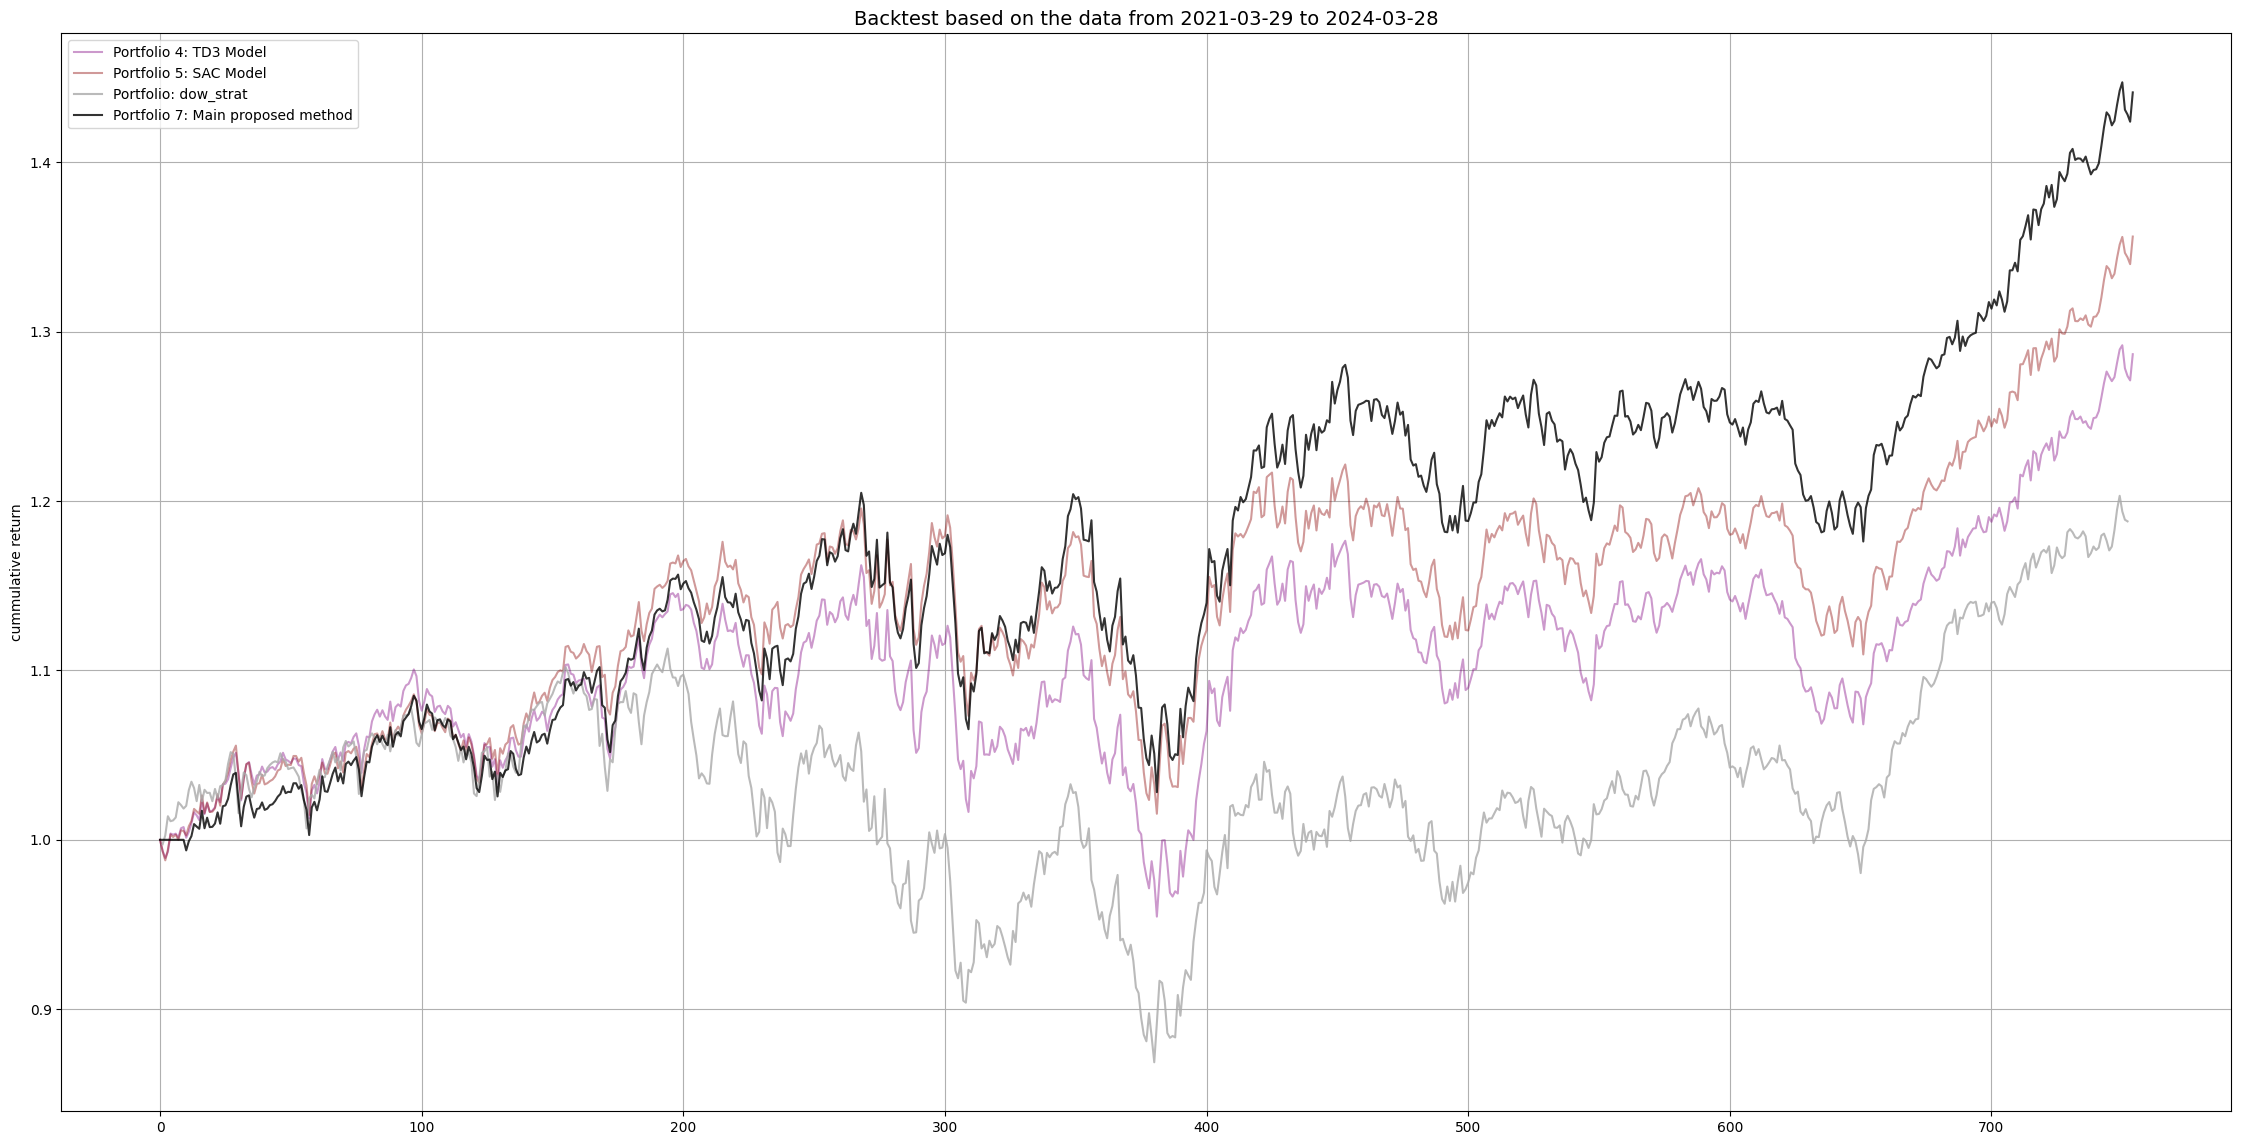

In [ ]:
fig, ax = plt.subplots(figsize=(28, 14))
td3_test_cum_returns.plot(ax=ax, color='purple', alpha=.4)
sac_test_cum_returns.plot(ax=ax, color='darkred', alpha=0.4)
dow_strat_cum.plot(ax=ax, color='darkgray', alpha=0.8)
main_proposed_method_cum_return.plot(
    ax=ax, color='black', alpha=0.8)
plt.legend(loc="best")
plt.grid(True)
ax.set_ylabel("cummulative return")
ax.set_title(
    "Backtest based on the data from 2021-03-29 to 2024-03-28", fontsize=14)
fig.savefig('./results/result_dow/back_test_on_test_data.pdf')
td3_test_cum_returns.to_csv('./results/result_dow/td3_test_cum_returns.csv')
sac_test_cum_returns.to_csv('./results/result_dow/sac_test_cum_returns.csv')
dow_strat_cum.to_csv('./results/result_dow/dow_strat_cum.csv')
main_proposed_method_cum_return.to_csv('./results/result_dow/main_proposed_method_cum_return.csv')
